In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, HTML

df = pd.read_csv('DATA/Barbies_Data.csv')

In [215]:
import seaborn as sns

# Define your custom pink color palette
custom_palette = ["#FFC0CB", "#FF69B4", "#FF1493", "#DB7093", "#C71585","#FEC5E5"]

# Set the custom palette as the default for Seaborn plots
sns.set_palette(custom_palette)
sns.set_style('whitegrid',  rc={'axes.labelcolor': "#C71585",    
        'xtick.color': "#DB7093",        
        'ytick.color': "#DB7093",
        'grid.color':'#FFC0CB',
        'axes.edgecolor':'#FFC0CB'
        })



In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1110 non-null   int64  
 1   Title       1110 non-null   object 
 2   Product #   1110 non-null   object 
 3   Released    1110 non-null   int64  
 4   Lowest      1110 non-null   int64  
 5   Average     465 non-null    float64
 6   Highest     1110 non-null   int64  
 7   URL         1110 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 69.5+ KB


In [217]:
df.describe()

,Unnamed: 0,Released,Lowest,Average,Highest
count,1110.000000,1110.000000,1110.000000,465.000000,1110.000000
mean,554.500000,2005.025225,47.816216,95.812903,136.028829
std,320.573704,11.308499,80.702040,166.505221,838.462752
min,0.000000,1959.000000,1.000000,7.000000,1.000000
25%,277.250000,1999.000000,12.000000,22.000000,30.000000
50%,554.500000,2009.000000,20.000000,35.000000,50.000000
75%,831.750000,2013.000000,44.750000,86.000000,115.000000
max,1109.000000,2020.000000,700.000000,1150.000000,27450.000000


In [218]:
df.head()

,Unnamed: 0,Title,Product #,Released,Lowest,Average,Highest,URL
0,0,Cinderella,16900,1996,1,19.0,55,https://www.barbiedb.com/wp-content/uploads/20...
1,1,2019 Holiday,FXF01,2019,9,26.0,67,https://www.barbiedb.com/wp-content/uploads/20...
2,2,The X-Files Giftset,19630,1998,11,28.0,57,https://www.barbiedb.com/wp-content/uploads/20...
3,3,Winter in New York Barbie,19429,1998,4,26.0,106,https://www.barbiedb.com/wp-content/uploads/20...
4,4,Holiday Visions Winter Fantasy Barbie,B2519,2003,1,24.0,98,https://www.barbiedb.com/wp-content/uploads/20...


In [219]:
#drop column 'Unnamed: 0', which is a duplicate of index
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [221]:
# The majority values in the column are missing, I have decided to drop it"
df.drop(['Average'],axis =1, inplace=True)

<span style="color: #E0218A; font-size: 30px;">Top ten most expensive Barbies!</span>

In [281]:
top_10 = df.nlargest(10, 'Highest')
top_10 = top_10[['Title','Highest', 'URL']]

In [282]:
def path_to_image_html(path):
    '''
     This function converts the image url to 
     '<img src="'+ path + '"/>' format. 

    '''

    return '<img src="'+ path + '" style=height:224px;width=100px;"/>'

HTML(top_10.to_html(escape=False, formatters=dict(URL=path_to_image_html)))

,Title,Highest,URL
416,Barbie #1,27450,
327,Dahlia Barbie,2423,
208,Golden Gala Barbie,1451,
12,Happy Holidays Barbie 1997 Brunette,1201,
458,City Smart Barbie,1151,
151,Byron Lars Coco Barbie,1101,
48,Special 2000 Edition Celebration Barbie,1051,
377,Barbie Baby-Sits Outfit,1036,
440,Harvey Nichols Special Edition Barbie,900,
247,Bob Mackie Countess Dracula Barbie,886,


<span style="color: #E0218A; font-size: 30px;">The oldest Barbie products</span>

In [279]:
oldest = df.nsmallest(10, 'Released')
oldest = oldest[['Title', 'Released', 'URL']]

In [280]:
def path_to_image_html(path):
    '''
     This function converts the image url to 
     '<img src="'+ path + '"/>' format. 

    '''

    return '<img src="'+ path + '" style=height:224px;width=100px;"/>'

HTML(oldest.to_html(escape=False, formatters=dict(URL=path_to_image_html)))

,Title,Released,URL
416,Barbie #1,1959,
539,Barbie Busy Gal Outfit,1960,
172,Barbie Bubble Cut,1961,
524,Barbie Doll Accessories,1961,
651,Montgomery Ward’s Mix N Match gift set,1962,
377,Barbie Baby-Sits Outfit,1963,
633,Ski Queen Barbie Outfit,1963,
923,Barbie Golden Elegance Outfit,1963,
438,"Barbie, Ken and Midge On Parade Gift set",1964,
451,Wedding Party Gift Set,1964,


In [222]:
release_year = df.groupby('Released')['Released'].count()

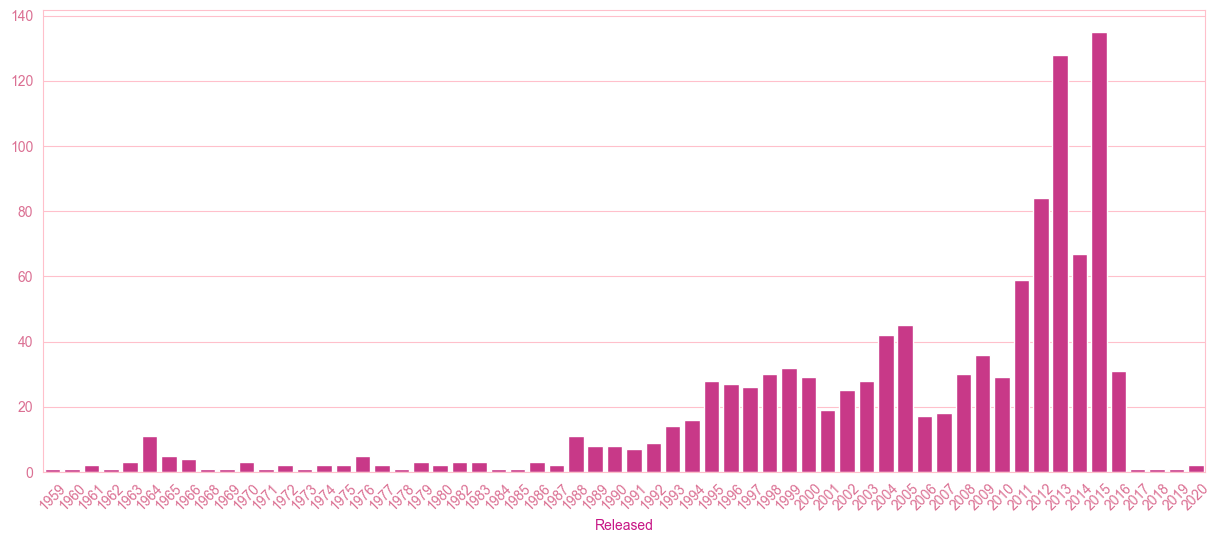

In [223]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation = 45)
sns.barplot(x=release_year.index, y=release_year.values, color='#E0218A');

In [224]:
df[df['Released'] == 2013].count()

Title        128
Product #    128
Released     128
Lowest       128
Highest      128
URL          128
dtype: int64

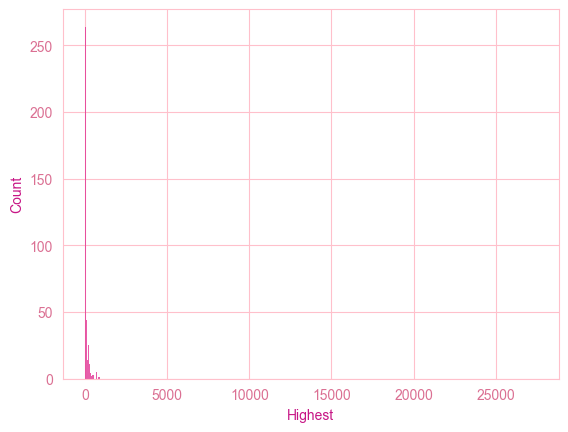

In [225]:
sns.histplot(data=df, x = 'Highest', color="#E0218A");

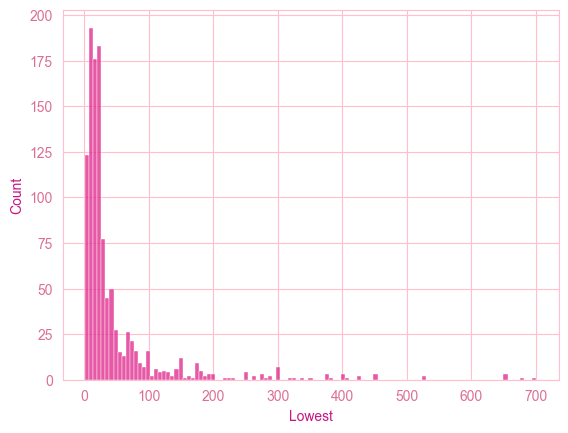

In [227]:
sns.histplot(data=df, x = 'Lowest', color="#E0218A");# previous color code #DB7093

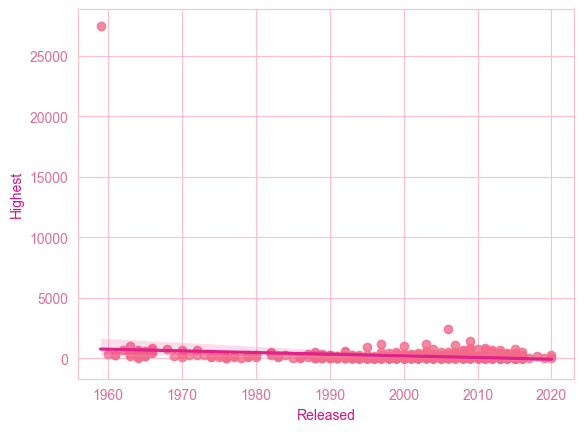

In [228]:
sns.regplot(data=df, x= 'Released', y = 'Highest', scatter_kws={'color':'#F26B8A'}, line_kws={'color': '#E0218A'});# previous color #E11584


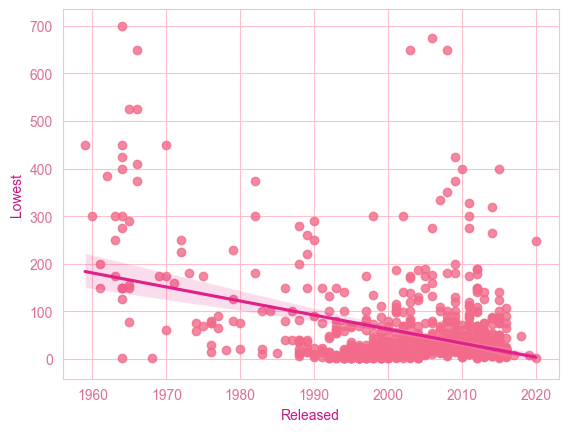

In [229]:
sns.regplot(data=df, x= 'Released', y = 'Lowest', scatter_kws={'color':'#F26B8A'}, line_kws={'color': '#E0218A'});

<span style="color: #E0218A; font-size: 30px;"> Remove Extreme Outliers in column "Highest"</span>




In [230]:

Q1 = np.percentile(df['Highest'], 25, method='midpoint')
Q3 = np.percentile(df['Highest'], 75, method='midpoint')
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

#create arrays of boolena values indicating the outlier rows
upper_array = np.where(df['Highest'] >= upper)[0]
lower_array = np.where(df['Highest'] <= lower)[0]

df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)


In [231]:
df.reset_index(drop = True, inplace = True)

<span style="color: #E0218A; font-size: 30px;"> Remove Extreme Outliers in column "Lowest"</span>

In [232]:
import numpy as np
Q1 = np.percentile(df['Lowest'], 25, method='midpoint')
Q3 = np.percentile(df['Lowest'], 75, method='midpoint')
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

#create arrays of boolena values indicating the outlier rows
upper_array = np.where(df['Lowest'] >= upper)[0]
lower_array = np.where(df['Lowest'] <= lower)[0]

df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

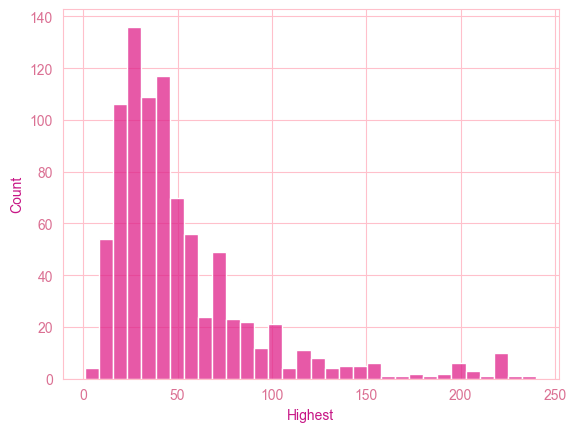

In [233]:
sns.histplot(data=df, x = 'Highest', color='#E0218A');

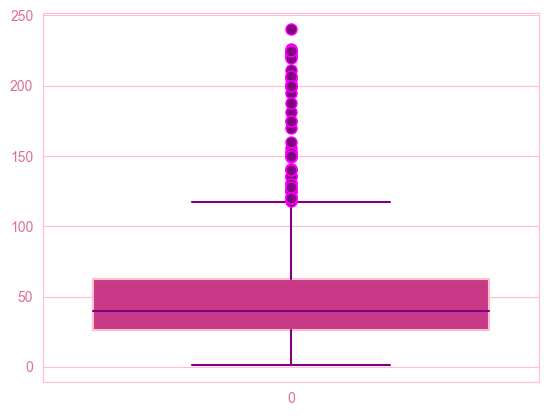

In [249]:
sns.boxplot(df['Highest'], color='#E0218A', boxprops=dict(edgecolor='pink'),medianprops=dict(color='purple'), whiskerprops =dict(color='purple'), flierprops=dict(marker='o', markerfacecolor='purple', markersize=8, markeredgecolor='magenta'), capprops=dict(color='purple'));

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875 entries, 0 to 982
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      875 non-null    object
 1   Product #  875 non-null    object
 2   Released   875 non-null    int64 
 3   Lowest     875 non-null    int64 
 4   Highest    875 non-null    int64 
 5   URL        875 non-null    object
dtypes: int64(3), object(3)
memory usage: 80.1+ KB


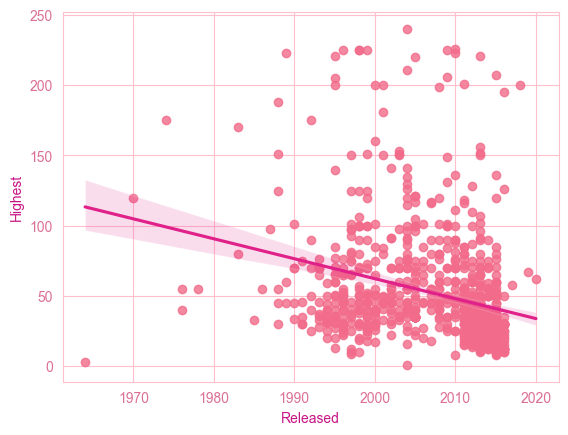

In [252]:
sns.regplot(data=df, x= 'Released', y = 'Highest', scatter_kws={'color':'#F26B8A'}, line_kws={'color': '#E0218A'});

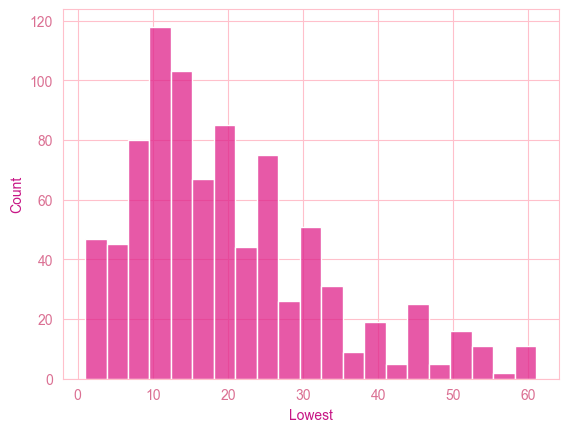

In [237]:
sns.histplot(data=df, x = 'Lowest', color='#E0218A');

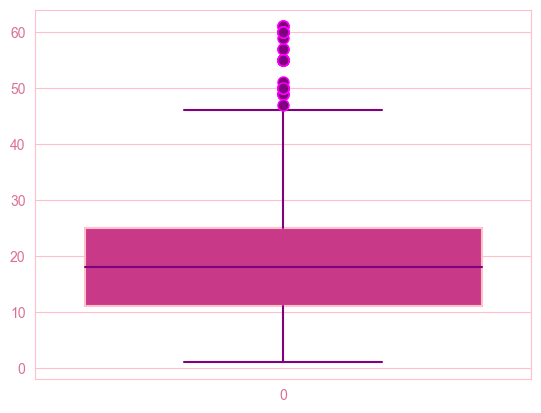

In [250]:
sns.boxplot(df['Lowest'], color='#E0218A', boxprops=dict(edgecolor='pink'),medianprops=dict(color='purple'), whiskerprops =dict(color='purple'), flierprops=dict(marker='o', markerfacecolor='purple', markersize=8, markeredgecolor='magenta'), capprops=dict(color='purple'));

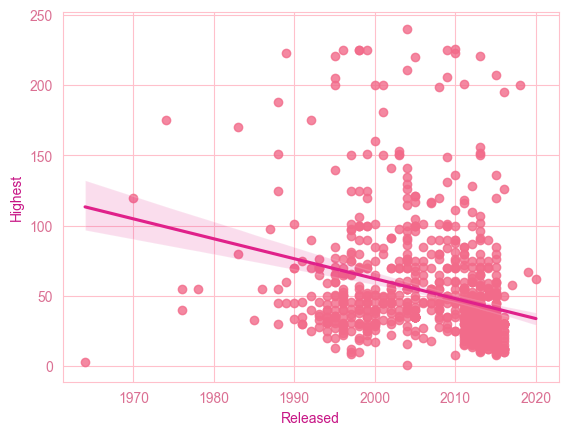

In [239]:
sns.regplot(data=df, x= 'Released', y = 'Highest', scatter_kws={'color':'#F26B8A'}, line_kws={'color':'#E0218A'});

<span style="color: #E0218A; font-size: 30px;">We see small to medium negative correlation between 'Barbie' release year and price. Older 'Barbies' are sold for higher prices</span>